In [ ]:
import cv2
import tensorflow.keras as keras
import tensorflow as tf
import math
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import random
import copy
 
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd  
 
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation, DBSCAN, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEy-kLM9XXeymQPcCcP5Y6c_huy_1lJW6wxl_l1gkfix-YxFfs08Qg
Mounted at /content/drive


In [ ]:
a = tf.constant([[1,2], [3,4]])
a[:,0]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 3], dtype=int32)>

In [ ]:
pip install fastdtw

In [ ]:
import fastdtw

In [ ]:
len_single = 5
len_pair = 1

In [ ]:
## belief vectors
BV12 = tf.Variable(np.random.randn(1,len_pair),trainable = True, dtype = tf.float64)
BV13 = tf.Variable(np.random.randn(1,len_pair ), trainable = True, dtype = tf.float64)
BV14 = tf.Variable(np.random.randn(1,len_pair), trainable = True, dtype = tf.float64)
BV23 = tf.Variable(np.random.randn(1,len_pair ), trainable = True, dtype = tf.float64)
BV24 = tf.Variable(np.random.randn(1,len_pair), trainable = True, dtype = tf.float64)
BV34 = tf.Variable(np.random.randn(1,len_pair ), trainable = True, dtype = tf.float64)

In [ ]:
marker = '1_5'

In [ ]:
#loading
np_var =  np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/IVs' + marker + '.npy')
 
  
 
BV12 = tf.Variable(np_var[:,6:6+len_pair])
BV13 = tf.Variable(np_var[:,6+len_pair:6 + 2*len_pair])
 
BV14 = tf.Variable(np_var[:,6+2*len_pair:6+3*len_pair])
BV23 = tf.Variable(np_var[:,6+3*len_pair:6+4*len_pair])
 
 
BV24 = tf.Variable(np_var[:,6+4*len_pair:6+5*len_pair])
BV34 = tf.Variable(np_var[:,6+5*len_pair:6 + 6*len_pair])

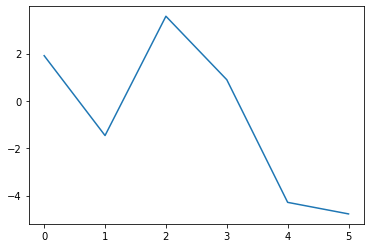

In [ ]:
lst_IVs = [BV12, BV13, BV14, BV23, BV24, BV34]
 
npBV12 = keras.backend.get_value(lst_IVs[0])
npBV13 = keras.backend.get_value(lst_IVs[1])
npBV14 = keras.backend.get_value(lst_IVs[2])
npBV23 = keras.backend.get_value(lst_IVs[3])
npBV24 = keras.backend.get_value(lst_IVs[4])
npBV34 = keras.backend.get_value(lst_IVs[5])
npBV = np.concatenate((npBV12, npBV13,npBV14, npBV23, npBV24, npBV34))
npBV.shape
y = []
for i in range(npBV.shape[0]):
  y.append(npBV[i,0])
plt.plot(y)

In [ ]:
np_var.shape

Data Generator



In [ ]:
 
#input
folder = '2-d_colliding'
#/content/drive/My Drive/VIPUL COLAB AND DATA/vipul_data
#path = '/content/drive/My Drive/VIPUL COLAB AND DATA/'
arr = np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/collision_and_pass_data/' + folder +'/0.npy')
pos_arr = arr[3:, 0:8]
vel_arr = arr[3:, 8:16]
 
 
  
pos__1 = pos_arr[:,0:2]
pos__2 = pos_arr[:,2:4]
pos__3 = pos_arr[:,4:6]
pos__4 = pos_arr[:,6:8]
 
vel__1 = vel_arr[:,8:10]
vel__2 = vel_arr[:,10:12]
vel__3 = vel_arr[:,12:14]
vel__4 = vel_arr[:,14:16]
 
print( pos__1.shape,   pos_arr.shape,  vel__1.shape)
print(arr[3:])

(1800, 2) (1800, 8) (1800, 0)
[[ 8.94999981 11.91666698  9.60048866 ... -5.         -5.
   5.        ]
 [ 8.89999962 11.83333397  8.72464466 ... -5.         -5.
   5.        ]
 [ 8.84999943 11.75000095  8.60797787 ... -5.         -5.
   5.        ]
 ...
 [27.09985733  8.83334637 19.28224182 ...  5.90975618 10.15564156
   3.11553311]
 [27.04985809  8.91667938 19.25541496 ...  5.90975618 10.15564156
   3.11553311]
 [26.99985886  9.0000124  19.2285881  ...  5.90975618 10.15564156
   3.11553311]]


Pick the moments of interaction (close approach)


In [ ]:
def distance(a, b):
  return np.sqrt(np.sum((a-b)**2))

In [ ]:
def rel_vel_mag(vel_a,vel_b):
  return np.sqrt(np.sum((vel_a-vel_b)**2))

In [ ]:
print(distance(np.array([0,3]), np.array([0,4])))

1.0


In [ ]:
lst = [[], [], [], [], [], []]
pairs = [(1,2), (1,3), (1,4), (2,3), (2,4), (3,4)]
r = 1.5
dist_for_min = 2*r + 0.1
dist = 4.2
n = 6
for i in range(n):
  start = -1
  end = 1
  interval = [0,0]
  j = 0
  min_dist = 30
  while(j < pos__1.shape[0]):
    if(start == -1 and distance(pos_arr[j,2*pairs[i][0]-2 : 2*pairs[i][0]],  pos_arr[j, 2*pairs[i][1]-2 : 2*pairs[i][1]]) < dist):
      print(i,j,  "start started")
      interval[0] = j
      start = 1
      end = -1
      min_dist = 30
    elif (start == 1 and end == -1):
      if(distance(pos_arr[j,2*pairs[i][0]-2 : 2*pairs[i][0]],  pos_arr[j, 2*pairs[i][1]-2 : 2*pairs[i][1]]) > dist):
        if(min_dist < dist_for_min):
          print(i, j, "exited from start, and saved")
          #save and set start = -1, end = 1
          interval[1] = j;
          lst[i].append(interval)
          interval = [0,0]
          start = -1
          end = 1
        else:
          #dont save and set start to -1, end = 1
          print(i, j, "exited from start, not saved")
          start = -1
          end = 1
          interval = [0,0]
      else:
        min_dist = min(min_dist, distance(pos_arr[j,2*pairs[i][0]-2 : 2*pairs[i][0]],  pos_arr[j, 2*pairs[i][1]-2 : 2*pairs[i][1]]))
    j += 1
 
 
print(lst)
 
popable = []
for i in range(len(lst)):
  for j in range(len(lst[i])):
    if(lst[i][j][0] == 0) :
      popable.append(i)
for i in popable:
  lst[i].pop(0)
print(lst)

0 0 start started
0 15 exited from start, and saved
0 681 start started
0 710 exited from start, and saved
0 731 start started
0 804 exited from start, and saved
0 965 start started
0 1002 exited from start, and saved
0 1557 start started
0 1594 exited from start, and saved
1 619 start started
1 684 exited from start, and saved
1 1688 start started
1 1733 exited from start, and saved
2 0 start started
2 30 exited from start, and saved
2 844 start started
2 906 exited from start, and saved
2 1383 start started
2 1430 exited from start, and saved
3 205 start started
3 216 exited from start, and saved
3 700 start started
3 739 exited from start, not saved
3 1188 start started
3 1214 exited from start, and saved
3 1248 start started
3 1391 exited from start, and saved
4 0 start started
4 26 exited from start, and saved
4 60 start started
4 62 exited from start, not saved
4 64 start started
4 79 exited from start, and saved
4 245 start started
4 261 exited from start, and saved
4 391 start 

In [ ]:
for i in range(6):
  for j in range(len(lst[i])):
    print("/////////////////////////////////////////////////",i , "///////////////////////", j )
    start = lst[i][j][0]
    end = lst[i][j][1]
    print([start, end])
    for k in range(start, end):
      print(distance(pos_arr[k,2*pairs[i][0]-2 : 2*pairs[i][0]],  pos_arr[k, 2*pairs[i][1]-2 : 2*pairs[i][1]]))

///////////////////////////////////////////////// 0 /////////////////////// 0
[681, 710]
4.127151357873155
3.962849971296073
3.8043433588867113
3.652386045136333
3.507829269819854
3.3716250507433685
3.2448253747301443
3.1285739363617555
3.0240874608993407
2.932623739955779
2.855434461204264
2.793703072520524
2.748471336158595
2.72056234022624
2.7105112325032352
2.718516096897755
2.744418942099633
2.787720901294711
2.847628355381473
2.9231205261375823
3.013026203566471
3.116098061603097
3.231076335955565
3.356737758764388
3.4919291812054496
3.6355876230797715
3.7867495635075406
3.9445524564207965
4.108231108309658
///////////////////////////////////////////////// 0 /////////////////////// 1
[731, 804]
4.176177491706219
4.073177670361455
3.9705245640284548
3.86824577552929
3.766371799672957
3.664936394259508
3.5639770063355805
3.4635352627819787
3.3636575358535534
3.2643955960635704
3.1658073668210975
3.0679577974872623
2.9709198739837666
2.8747757886877388
2.7796182939287486
2.685552265

The *model* objective -> achieve a describing vector of interaction seen in the time series of positions and velocity. 

1> Compare the two time series (absolute distances), and group the similar ones.

2> Predict distance, and magnitude of relative velocity,

3> next try -> distance, and relative approach velocity


In [ ]:
tf.keras.backend.set_floatx('float64')
delta_t = 1/60

In [ ]:
#pos1_t0,pos2_t0, vel1_t0, vel2_t0
def PP():
  inp_BV = keras.layers.Input(shape = (len_pair, ), dtype = tf.float64)
  inp_pos = keras.layers.Input(shape = (2, ) , dtype = tf.float64)
  inp_vel = keras.layers.Input(shape = (2, ) , dtype = tf.float64)
  concat_BV_pos = keras.layers.Concatenate(axis = -1)([inp_BV, inp_pos])
  out = keras.layers.Dense(12, activation = 'softplus')(concat_BV_pos)
  out = keras.layers.Dense(10, activation = 'softplus')(out)
  out = keras.layers.Dense(5, activation = 'softplus')(out)

  '''concat_pos_vel = keras.layers.Concatenate(axis = -1)([inp_pos, inp_vel])
  abs_rel_pos = keras.layers.Dense(12)(concat_pos_vel)
  abs_rel_pos = keras.layers.Dense(10)(abs_rel_pos)
  abs_rel_pos = keras.layers.Dense(6)(abs_rel_pos)
  abs_rel_pos = keras.layers.Dense(2)(abs_rel_pos)'''
  delta_abs_rel_pos = keras.layers.Lambda(lambda x: tf.math.scalar_mul(delta_t,x))(inp_vel)
  delta_abs_rel_pos = keras.layers.Dense(2)(delta_abs_rel_pos)
  abs_rel_pos = keras.layers.Add()([inp_pos, delta_abs_rel_pos])
  
  

  concat_out_vel = keras.layers.Concatenate(axis = -1)([out, inp_vel])
  abs_rel_vel = keras.layers.Dense(12, activation = 'softplus')(concat_out_vel)
  abs_rel_vel = keras.layers.Dense(12, activation = 'softplus')(abs_rel_vel)
  abs_rel_vel = keras.layers.Dense(8, activation = 'softplus')(abs_rel_vel)
  abs_rel_vel = keras.layers.Dense(6, activation = 'softplus')(abs_rel_vel)
  abs_rel_vel = keras.layers.Dense(2)(abs_rel_vel)

  
  output = keras.layers.Concatenate(axis = 1)([abs_rel_pos, abs_rel_vel])
  model = keras.Model([inp_BV, inp_pos, inp_vel], [output])
  return model

In [ ]:
# concat based inception
def PP():
  inp_BV = keras.layers.Input(shape = (len_pair, ), dtype = tf.float64)
  inp = keras.layers.Input(shape = (3, ) , dtype = tf.float64)
  
  concat = keras.layers.Concatenate(axis = -1)([inp_BV, inp])
  out = keras.layers.Dense(13, activation = 'sigmoid')(concat)

  concat = keras.layers.Concatenate(axis = -1)([inp_BV, out])
  out = keras.layers.Dense(12, activation = 'sigmoid')(concat)

  concat = keras.layers.Concatenate(axis = -1)([inp_BV, out])
  out = keras.layers.Dense(10, activation = 'sigmoid')(concat)

  concat = keras.layers.Concatenate(axis = -1)([inp_BV, out])
  out = keras.layers.Dense(10, activation = 'sigmoid')(concat)

  out = keras.layers.Dense(1)(out)
  model = keras.Model([inp_BV, inp], [out])
  return model

In [ ]:
# average model
def PP():
  
  inp = keras.layers.Input(shape = (2, ) , dtype = tf.float64)
  
  
  out = keras.layers.Dense(13, activation = 'sigmoid')(inp)

  
  out = keras.layers.Dense(12, activation = 'sigmoid')(out)

  
  out = keras.layers.Dense(10, activation = 'sigmoid')(out)

  
  out = keras.layers.Dense(10,)(out)

  out = keras.layers.Dense(1)(out)
  model = keras.Model([inp], [out])
  return model

In [ ]:
# bv with avrage
def PP():
  inp_BV = keras.layers.Input(shape = (len_pair, ), dtype = tf.float64)
  inp = keras.layers.Input(shape = (2, ) , dtype = tf.float64)
  concat = keras.layers.Concatenate(axis = -1)([inp_BV, inp])
  
  out = keras.layers.Dense(13, activation = 'sigmoid')(concat)

  
  out = keras.layers.Dense(12, activation = 'sigmoid')(out)

  
  out = keras.layers.Dense(10, activation = 'sigmoid')(out)

  
  out = keras.layers.Dense(10,)(out)

  out = keras.layers.Dense(1)(out)
  model = keras.Model([inp_BV, inp], [out])
  return model

In [ ]:
#addition based inception
def PP():
  inp_BV = keras.layers.Input(shape = (len_pair, ), dtype = tf.float64)
  inp = keras.layers.Input(shape = (3, ) , dtype = tf.float64)

  concat = keras.layers.Concatenate(axis = -1)([inp_BV, inp])
  out = keras.layers.Dense(13, activation = 'tanh')(concat)
  
  out = keras.layers.Dense(12, activation = 'tanh')(out)
  add = keras.layers.Dense(12)(inp_BV)
  out = keras.layers.Add()([out, add])

  out = keras.layers.Dense(10, activation = 'tanh')(out)
  add = keras.layers.Dense(10)(inp_BV)
  out = keras.layers.Add()([out, add])

  out = keras.layers.Dense(5, activation = 'tanh')(out)
  add = keras.layers.Dense(5)(inp_BV)
  out = keras.layers.Add()([out, add])

  out = keras.layers.Dense(5, activation = 'tanh')(out)
  out = keras.layers.Dense(2)(out)
  
  model = keras.Model([inp_BV, inp], [out])
  return model

In [ ]:
#time series, conv1d based
def PP():
  inp_BV = keras.layers.Input(shape = (len_pair, ), dtype = tf.float64)
  inp = keras.layers.Input(shape = (3, ) , dtype = tf.float64)

  concat = keras.layers.Concatenate(axis = -1)([inp_BV, inp])
  out = keras.layers.Dense(13, activation = 'tanh')(concat)
  
  out = keras.layers.Dense(12, activation = 'tanh')(out)
  add = keras.layers.Dense(12)(inp_BV)
  out = keras.layers.Add()([out, add])

  out = keras.layers.Dense(10, activation = 'tanh')(out)
  add = keras.layers.Dense(10)(inp_BV)
  out = keras.layers.Add()([out, add])

  out = keras.layers.Dense(5, activation = 'tanh')(out)
  add = keras.layers.Dense(5)(inp_BV)
  out = keras.layers.Add()([out, add])

  out = keras.layers.Dense(5, activation = 'tanh')(out)
  out = keras.layers.Dense(2)(out)
  
  model = keras.Model([inp_BV, inp], [output])
  return model

In [ ]:
mod = PP()
mod.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 3)            0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 13)           52          concatenate[0][0]     

In [ ]:
def loss_fn(output, next_output):
  loss_mag = tf.reduce_mean(tf.losses.mean_squared_error(output, next_output))
  #loss_ang = tf.reduce_mean(tf.losses.mean_squared_error(output[:,1:2], next_output[:,1:2]))
  loss = loss_mag
  #print(":: total loss : ", loss)
 
  return loss

In [ ]:
 
mod = keras.models.load_model('/content/drive/My Drive/VIPUL COLAB AND DATA/m' + marker + '.hdf5')
mod.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 13)                39        
_________________________________________________________________
dense_6 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 458
Trainable params: 458
Non-trainable params: 0
________________________________________________________

In [ ]:
lst_IVs = [BV12, BV13, BV14, BV23, BV24, BV34]

In [ ]:
def window_generator(start , finish, pair):
    inp_pos_first = pos_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_pos_second = pos_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_pos = np.subtract(inp_pos_first  ,inp_pos_second)
    abs_rel_dist = np.sqrt(np.sum((np.subtract(inp_pos_first  ,inp_pos_second))**2, axis = 1, keepdims = True))
    
    inp_vel_first = vel_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_vel_second = vel_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_vel = np.subtract(inp_vel_first  ,inp_vel_second)
    abs_rel_vel = np.sqrt(np.sum((np.subtract(inp_vel_first  ,inp_vel_second))**2, axis = 1, keepdims = True))
    
    inp = np.concatenate((rel_pos, rel_vel), axis = 1)
    
    return inp

In [ ]:
 
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
non_zeros_interaction_pairs = [0,0,0,0,0,0]
for i in range(1800):
  print('iteration ;:::: ', i)
  loss = 0

  with tf.GradientTape() as Tape:
    for j in range(6):
      for k in range(len(lst[j])):
        non_zeros_interaction_pairs[j] = 1
        start = lst[j][k][0]
        end = lst[j][k][1]
        data = window_generator(start, end+1, pairs[j])
        inp_dist_vel = data[0:1, :]
        
        out_dist_vel = data[1:, :]
        
        output_ = mod([lst_IVs[j], inp_dist_vel[:,0:2], inp_dist_vel[:,2:4]])
        
        output = output_
        
        for l in range(start+1, end):
          output_ = mod([lst_IVs[j], output_[:, 0:2], output_[:, 2:4]])
          output = tf.concat([output, output_], axis = 0)
        loss_temp = loss_fn(output, out_dist_vel)
        loss += loss_temp
  print(i, j , k, len(lst[j]), data.shape, inp_dist_vel.shape, non_zeros_interaction_pairs, lst_IVs[j].shape, loss_temp, loss)
  diff_var_lst = [mod.trainable_variables]
  for m in range(6):
    if (non_zeros_interaction_pairs[m] == 1):
      diff_var_lst.append(lst_IVs[m])
  grad = Tape.gradient(loss, diff_var_lst)
  
  optimizer.apply_gradients(zip(grad[0], mod.trainable_variables))
  optimizer.apply_gradients(zip(grad[1:], diff_var_lst[1:]))
  
  
  
  IVs = np.concatenate((np.asarray([non_zeros_interaction_pairs]), keras.backend.get_value(BV12), keras.backend.get_value(BV13), keras.backend.get_value(BV14), keras.backend.get_value(BV23), keras.backend.get_value(BV24), keras.backend.get_value(BV34)), axis = 1)
  mod.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'm' + marker + '.hdf5')
  np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/IVs' + marker + '.npy',IVs)


index         Ball pairs    colliding status          type of force         Konstant of force
0                  1-2                  0.0                  spring                  1.0
1                  1-3                  0.0                  spring                  5.0
2                  1-4                  0.0                  spring                  4.0
3                  2-3                  1.0                  spring                  1.0
4                  2-4                  1.0                  spring                  23.0
5                  3-4                  1.0                  spring                  22.0


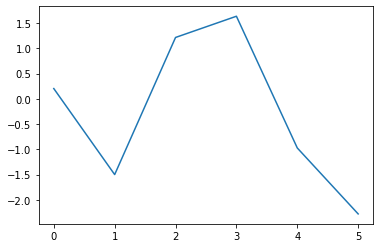

In [ ]:
#  INFO
pairs_s = ["1-2", "1-3", "1-4", "2-3", "2-4", "3-4"]
space = "                "
print("index        ", "Ball pairs   ", "colliding status         ", "type of force        ", "Konstant of force")
for i in range(6):
  if (arr[0,i+6]==1):
    if (arr[1,i]) > 0:
      print(i, space ,pairs_s[i],space,  arr[0, i],space,  'Repulsive Gravitational', space,  arr[1,i])
    else: 
      print(i, space, pairs_s[i], space,  arr[0, i], space,  'attractive gravitational', space,  arr[1,i])
  else:
    print(i, space ,pairs_s[i],  space,  arr[0, i], space,  'spring', space, arr[1,i])
 
npBV12 = keras.backend.get_value(lst_IVs[0])
npBV13 = keras.backend.get_value(lst_IVs[1])
npBV14 = keras.backend.get_value(lst_IVs[2])
npBV23 = keras.backend.get_value(lst_IVs[3])
npBV24 = keras.backend.get_value(lst_IVs[4])
npBV34 = keras.backend.get_value(lst_IVs[5])
npBV = np.concatenate((npBV12, npBV13,npBV14, npBV23, npBV24, npBV34))
npBV.shape
y = []
for i in range(npBV.shape[0]):
  y.append(npBV[i,0])
plt.plot(y)
#  INFO

[0 1 0 0 1 1]


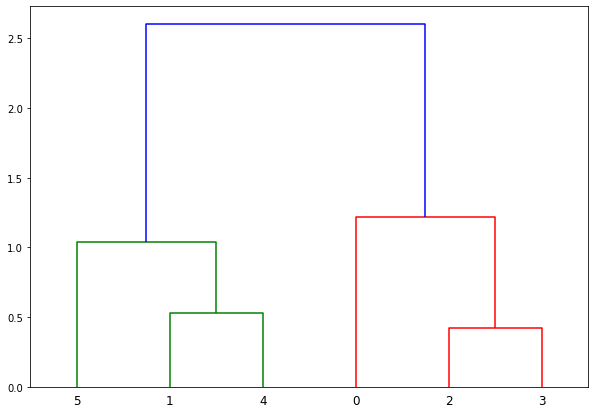

In [ ]:
 
X = npBV
 
cluster = AgglomerativeClustering(n_clusters=2, affinity='l2', linkage='average')
cluster.fit_predict(X)
print(cluster.labels_)
 
 
linked = linkage(X, 'average')
 
labelList = range(0, 6)
 
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()

In [ ]:
8
model = AffinityPropagation(damping=0.6)
X = npBV
model.fit(X)

yhat = model.predict(X)
print(yhat)

clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

[1 0 1 1 0 0]


IndexError: ignored

In [ ]:



X = npBV

model = KMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)
print(yhat)
clusters = unique(yhat)
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

[0 1 0 0 1 1]


IndexError: ignored

new


In [ ]:
 
def window_generator(start , finish, pair):
    #abs_pos
    inp_pos_first = pos_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_pos_second = pos_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_pos = np.subtract(inp_pos_first  ,inp_pos_second)
    abs_rel_dist = np.sqrt(np.sum((np.subtract(inp_pos_first  ,inp_pos_second))**2, axis = 1, keepdims = True))
    #abs vel
    inp_vel_first = vel_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_vel_second = vel_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_vel = np.subtract(inp_vel_first  ,inp_vel_second)
    abs_rel_vel = np.sqrt(np.sum((np.subtract(inp_vel_first  ,inp_vel_second))**2, axis = 1, keepdims = True))
    
    len = rel_vel.shape[0]
    #dv
    dv = np.zeros((rel_vel.shape))
    for i in range(len-1):
      dv[i] = rel_vel[i+1]-rel_vel[0]
    
    #app_vel_mag
    app_vel_mag = np.zeros((len, 1))
    for i in range(len):
      if(abs_rel_dist[i,0] > 0):
        app_vel_mag[i, 0] = np.dot(rel_vel[i], rel_pos[i])/abs_rel_dist[i,0]
      else :
        app_vel_mag[i,0] = app_vel_mag[i-1,0]
        

    #abs_dv
    abs_dv = np.sqrt(np.sum((dv)**2, axis = 1, keepdims = True))
 
    #theta_v_x 
    theta_v_x = np.zeros((len, 1))
    for i in range(theta_v_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = rel_vel[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    
    
    #theta_dv_x
    theta_dv_x = np.zeros((len, 1))
    for i in range(theta_dv_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = dv[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    
 
    inp = np.concatenate((abs_rel_dist[:len-1,:], app_vel_mag[:len-1,:], abs_dv[:len-1,:]), axis = 1)
    
    return inp

In [ ]:
def BV_window_generator(start , finish, j):
  bv = []
  for i in range(finish-start):
    bv.append(lst_IVs[j])
  
  bv1 = tf.concat(bv, axis = 0)
  return bv1

In [ ]:
lst_IVs = [BV12, BV13, BV14, BV23, BV24, BV34]

In [ ]:
j = 1
ind = [0,1,1,0,0,0] 
#ind = [0,0,0,0,0,0]
k = ind[j]
start = lst[j][k][0]
end = lst[j][k][1]
if(j == 1):
  start = start+1
  end = end-6
data = window_generator(start, end+1, pairs[j])
inp = data[0:data.shape[0]-1, 0]
exp_out = data[:, :]
print(inp)
exp_out

[4.1611774  3.97787412 3.79508779 3.61289688 3.43139625 3.25070151
 3.07095492 2.89233326 2.71505856 2.53941293 2.36575925 2.19457044
 2.02647125 1.86229851 1.70318806 1.55069891 1.40698557 1.27501899
 1.15881931 1.06356699 0.99529443 0.95977656 0.96065332 0.99782881
 1.06751749 1.16389373 1.28094784 1.41355222 1.55774071 1.71058649
 1.86996788 2.03434937 2.20261177 2.37392999 2.54768764 2.72341786
 2.90076215]


array([[  4.1611774 , -11.01235312,   0.        ],
       [  3.97787412, -10.98341501,   0.        ],
       [  3.79508779, -10.95018927,   0.        ],
       [  3.61289688, -10.91180239,   0.        ],
       [  3.43139625, -10.86715187,   0.        ],
       [  3.25070151, -10.81483223,   0.        ],
       [  3.07095492, -10.75303273,   0.        ],
       [  2.89233326, -10.67939386,   0.        ],
       [  2.71505856, -10.5908041 ,   0.        ],
       [  2.53941293, -10.48310823,   0.        ],
       [  2.36575925, -10.35068461,   0.        ],
       [  2.19457044, -10.18582718,   0.        ],
       [  2.02647125,  -9.97783835,   0.        ],
       [  1.86229851,  -9.71170285,   0.        ],
       [  1.70318806,  -9.36618657,   0.        ],
       [  1.55069891,  -8.91124921,   0.        ],
       [  1.40698557,  -8.30495491,   0.        ],
       [  1.27501899,  -7.49105626,   0.        ],
       [  1.15881931,  -6.40093428,   0.        ],
       [  1.06356699,  -4.96801

In [ ]:
# average model
ind = [0,1,1,0,0,0] 
#ind = [0,0,0,0,0,0]
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
non_zeros_interaction_pairs = [0,0,0,0,0,0]
for i in range(20000):
  print('iteration ;:::: ', i)
  loss = 0
 
  with tf.GradientTape() as Tape:
    for j in range(1, 6):
      k = ind[j]
      non_zeros_interaction_pairs[j] = 1
      start = lst[j][k][0]
      end = lst[j][k][1]
      if(j == 1):
        start = start+1
        end = end-6
      data = window_generator(start, end+1, pairs[j])
      inp = data[:, 0:2]
      exp_out = data[:, 2:]
      #bv = BV_window_generator(start, end, j)
      
      output = mod([ inp])
      output = tf.multiply(output, lst_IVs[j])
      loss_temp = loss_fn(output, exp_out)
      loss += loss_temp
  print("INFO :: " , loss)
  #print(lst_IVs[0])
  diff_var_lst = [mod.trainable_variables]
  
  for m in range(6):
    if (non_zeros_interaction_pairs[m] == 1):
      diff_var_lst.append(lst_IVs[m])
  grad = Tape.gradient(loss, diff_var_lst)
  #print(lst_IVs)
  #optimizer.apply_gradients(zip(grad[0], mod.trainable_variables))
  optimizer.apply_gradients(zip(grad[1:], diff_var_lst[1:]))
  
  
  
  IVs = np.concatenate((np.asarray([non_zeros_interaction_pairs]), keras.backend.get_value(BV12), keras.backend.get_value(BV13), keras.backend.get_value(BV14), keras.backend.get_value(BV23), keras.backend.get_value(BV24), keras.backend.get_value(BV34)), axis = 1)
  mod.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'm' + marker + '.hdf5')
  np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/IVs' + marker + '.npy',IVs)

iteration ;::::  0
INFO ::  tf.Tensor(24858.737556498116, shape=(), dtype=float64)
iteration ;::::  1
INFO ::  tf.Tensor(24821.417787197533, shape=(), dtype=float64)
iteration ;::::  2
INFO ::  tf.Tensor(24784.12756125787, shape=(), dtype=float64)
iteration ;::::  3
INFO ::  tf.Tensor(24746.867376975973, shape=(), dtype=float64)
iteration ;::::  4
INFO ::  tf.Tensor(24709.637728689617, shape=(), dtype=float64)
iteration ;::::  5
INFO ::  tf.Tensor(24672.439105685426, shape=(), dtype=float64)
iteration ;::::  6
INFO ::  tf.Tensor(24635.27199113958, shape=(), dtype=float64)
iteration ;::::  7
INFO ::  tf.Tensor(24598.13686109965, shape=(), dtype=float64)
iteration ;::::  8
INFO ::  tf.Tensor(24561.034183515178, shape=(), dtype=float64)
iteration ;::::  9
INFO ::  tf.Tensor(24523.964417323587, shape=(), dtype=float64)
iteration ;::::  10
INFO ::  tf.Tensor(24486.92801159698, shape=(), dtype=float64)
iteration ;::::  11
INFO ::  tf.Tensor(24449.92540475509, shape=(), dtype=float64)
iterati

KeyboardInterrupt: ignored

In [ ]:
# bv average model
ind = [0,1,1,0,0,0] 
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
non_zeros_interaction_pairs = [0,0,0,0,0,0]
for i in range(20000):
  print('iteration ;:::: ', i)
  loss = 0
 
  with tf.GradientTape() as Tape:
    for j in range(6):
      k = ind[j]
      non_zeros_interaction_pairs[j] = 1
      start = lst[j][k][0]
      end = lst[j][k][1]
      if(j == 1):
        start = start+1
        end = end-6
      data = window_generator(start, end+1, pairs[j])
      inp = data[:, 0:2]
      exp_out = data[:, 2:]
      bv = BV_window_generator(start, end, j)
      
      output = mod([bv, inp])
      
      loss_temp = loss_fn(output, exp_out)
      loss += loss_temp
  print("INFO :: " , loss)
  #print(lst_IVs[0])
  diff_var_lst = [mod.trainable_variables]
  
  for m in range(6):
    if (non_zeros_interaction_pairs[m] == 1):
      diff_var_lst.append(lst_IVs[m])
  grad = Tape.gradient(loss, diff_var_lst)
  #print(lst_IVs)
  optimizer.apply_gradients(zip(grad[0], mod.trainable_variables))
  optimizer.apply_gradients(zip(grad[1:], diff_var_lst[1:]))
  
  
  
  IVs = np.concatenate((np.asarray([non_zeros_interaction_pairs]), keras.backend.get_value(BV12), keras.backend.get_value(BV13), keras.backend.get_value(BV14), keras.backend.get_value(BV23), keras.backend.get_value(BV24), keras.backend.get_value(BV34)), axis = 1)
  mod.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'm' + marker + '.hdf5')
  np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/IVs' + marker + '.npy',IVs)

Streaming output truncated to the last 5000 lines.
INFO ::  tf.Tensor(0.0069025566849848135, shape=(), dtype=float64)
iteration ;::::  17501
INFO ::  tf.Tensor(0.006902095112045968, shape=(), dtype=float64)
iteration ;::::  17502
INFO ::  tf.Tensor(0.006901633346805162, shape=(), dtype=float64)
iteration ;::::  17503
INFO ::  tf.Tensor(0.006901171389127598, shape=(), dtype=float64)
iteration ;::::  17504
INFO ::  tf.Tensor(0.006900709238875173, shape=(), dtype=float64)
iteration ;::::  17505
INFO ::  tf.Tensor(0.006900246895909733, shape=(), dtype=float64)
iteration ;::::  17506
INFO ::  tf.Tensor(0.006899784360096353, shape=(), dtype=float64)
iteration ;::::  17507
INFO ::  tf.Tensor(0.006899321631297928, shape=(), dtype=float64)
iteration ;::::  17508
INFO ::  tf.Tensor(0.0068988587093781455, shape=(), dtype=float64)
iteration ;::::  17509
INFO ::  tf.Tensor(0.006898395594203771, shape=(), dtype=float64)
iteration ;::::  17510
INFO ::  tf.Tensor(0.006897932285636308, shape=(), dtype=

time series

output features of time series, not comparison based, model takes in a single time series and outputs the characterstics.

In [ ]:
# 1_5
#(j1, k1)
# ball 4 is out

j_s = [0,1,3]
Y = {0: np.zeros((1,1)), 1 : np.zeros((1,1)), 2: np.zeros((1,1)), 3:np.ones((1,1)), 4:np.ones((1,1)), 5:np.ones((1,1))}
n_pairs = 6
n_features = input('your no. of features')
n_features = int(n_features)
Y = []
for i in range(n_pairs):
  temp = input(str(i))
  if len(temp) == n_features:
    temp_lst = []
    for j in range(n_features):
      if (int(temp[j]) == 1 or int(temp[j]) == 0 ):
        print(i,j)
        temp_lst.append(int(temp[j]))
      else:
        print("Disgust")
        break
    Y.append(temp_lst)
  else:
    print("Disgust")
    break
Y = np.asarray(Y)
print(Y, Y.shape)

your no. of features2
001
0 0
0 1
101
1 0
1 1
201
2 0
2 1
310
3 0
3 1
410
4 0
4 1
510
5 0
5 1
[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]] (6, 2)


In [ ]:
def encoder():
  inp = keras.Input(shape = (None, 2))
  out = keras.layers.LSTM(20, )(inp)
  out = keras.layers.Dense(10*n_features, activation = 'sigmoid')(out)
  out = keras.layers.Dense(5*n_features,  activation = 'sigmoid')(out)
  out = keras.layers.Dense(1*n_features,  activation = 'sigmoid')(out)
  model = keras.Model(inp, out)
  return model

In [ ]:
enc = encoder()
enc.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 2)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 20)                1840      
_________________________________________________________________
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 2,492
Trainable params: 2,492
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def loss_fn(y_true, y_pred):
  loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
  print("Magnitude loss :", loss)
  return loss

In [ ]:
a = np.array([1,2,3])
b = np.array([2,3,4])
np.sqrt(a)

array([1.        , 1.41421356, 1.73205081])

In [ ]:
def window_generator(start , finish, pair):
    #abs_pos
    inp_pos_first = pos_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_pos_second = pos_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_pos = np.subtract(inp_pos_first  ,inp_pos_second)
    abs_rel_dist = np.sqrt(np.sum((np.subtract(inp_pos_first  ,inp_pos_second))**2, axis = 1, keepdims = True))
    #abs vel
    inp_vel_first = vel_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_vel_second = vel_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_vel = np.subtract(inp_vel_first  ,inp_vel_second)
    abs_rel_vel = np.sqrt(np.sum((np.subtract(inp_vel_first  ,inp_vel_second))**2, axis = 1, keepdims = True))
    
    len = rel_vel.shape[0]
    #dv
    dv = np.zeros((rel_vel.shape))
    for i in range(len-1):
      dv[i] = rel_vel[i+1]-rel_vel[i]
    
    #abs_dv
    abs_dv = np.sqrt(np.sum((dv)**2, axis = 1, keepdims = True))

    #theta_v_x 
    theta_v_x = np.zeros((len, 1))
    for i in range(theta_v_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = rel_vel[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    
    
    #theta_dv_x
    theta_dv_x = np.zeros((len, 1))
    for i in range(theta_dv_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = dv[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    

    inp = np.concatenate((abs_rel_dist[:len-1,:], abs_rel_vel[:len-1,:], theta_v_x[:len-1,:], abs_dv[:len-1,:], theta_dv_x[:len-1,:]), axis = 1)
    
    return inp

In [ ]:
enc = keras.models.load_model('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'enc' + marker + '.hdf5')
enc.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, 2)]         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                1840      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 2,492
Trainable params: 2,492
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
non_zeros_interaction_pairs = [0,0,0,0,0,0]
for i in range(500):
  print('iteration ;:::: ', i)
  loss = 0

  with tf.GradientTape() as Tape:
    for j in j_s:
      for k in range(len(lst[j])):
        non_zeros_interaction_pairs[j] = 1
        start = lst[j][k][0]
        end = lst[j][k][1]
        data = window_generator(start, end+1, pairs[j])
        inp = data[:, 3:]
        inp = np.expand_dims(inp, axis = 0)
        exp_out = np.expand_dims(Y[j], axis = 0)
        
        out = enc(inp)
        print(j, k, inp.shape, exp_out.shape, out)
        loss_temp = loss_fn(exp_out, out)
        loss += loss_temp
  
  print("INFO :: " , loss)
  grad = Tape.gradient(loss, enc.trainable_variables)
  optimizer.apply_gradients(zip(grad, enc.trainable_variables))
  
  enc.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'enc' + marker + '.hdf5')
 

In [ ]:

threshold = 0.5
def similarity(out, benchmark):
  score = 0
  for i in range (out.shape[0]):
    if (out[i] >= threshold and benchmark[i] == 1):
      score += 1
    elif (out[i] <= threshold and benchmark[i] == 0):
      score += 1
    else:
      score -= 1
  score = score/n_features
  return score

In [ ]:
j_test = [2,4,5]
closeness_matrix = np.ones((len(j_test), len(j_s)))
#list of feature vectors for j_test
outputs = [] 
for j in range(len(j_test)):
  output = np.zeros((1, n_features))
  for k in range(len(lst[j_test[j]])):
    start = lst[j_test[j]][k][0]
    end = lst[j_test[j]][k][1]
    data = window_generator(start, end+1, pairs[j_test[j]])
    inp = data[:, 3:]
    inp = np.expand_dims(inp, axis = 0)
    exp_out = np.expand_dims(Y[j], axis = 0)
    out = enc(inp)
    output = np.add(out, output)
  output = output/len(lst[j_test[j]])
  outputs.append(output[0,:])
print(outputs)

for i in range(len(j_test)):
  for j in range(len(j_s)):
    temp = similarity(outputs[i], Y[j_s[j]])
    closeness_matrix[i, j] = temp
print(closeness_matrix)




[array([0.01033352, 0.99149746]), array([0.78614455, 0.21199086]), array([0.9800972 , 0.01711432])]
[[ 1.  1. -1.]
 [-1. -1.  1.]
 [-1. -1.  1.]]


In [ ]:
indices = []
for i in j_test:
  indices.append(i)
col = []
for i in j_s:
  col.append(i)

df = pd.DataFrame(data=closeness_matrix, index=indices, columns=col)
print(df)

     0    1    3
2  1.0  1.0 -1.0
4 -1.0 -1.0  1.0
5 -1.0 -1.0  1.0


comparison based model, compare two given time series and output their degree of closeness from 0 to 1

In [ ]:
X_indices = []

j_s = [0,1,3]
for j in j_s:
  ln = len(lst[j])
  for k1 in range(ln):
    for k2 in range(ln):
      print(k1, k2)
      temp = ((j,k1), (j,k2))
      X_indices.append(temp)
print(len(X_indices))

X_triplet = []
for i in j_s:
  for j in j_s:
    if(i == j):
      continue
    
    for ik1_1 in range(len(lst[i])):
      for ik1_2 in range(len(lst[i])):
        for ik2_1 in range(len(lst[i])):
          for jk2_1 in range(len(lst[j])):
            for jk3_1 in range(len(lst[j])):
              for jk3_2 in range(len(lst[j])):
                temp = (((i, ik1_1), (i, ik1_2)), ((i, ik2_1), (j, jk2_1)), ((j, jk3_1), (j, jk3_2)))
                print(temp)
                X_triplet.append(temp)
print(len(X_triplet))

In [ ]:
def similarity_model():
  inp1 = keras.Input(shape = (None, 2))
  inp2 = keras.Input(shape = (None, 2))

  encoder = keras.layers.LSTM(20)

  encoded1 = encoder(inp1)
  encoded2 = encoder(inp2)

  concat = keras.layers.Concatenate(axis = -1)([encoded1, encoded2])

  out = keras.layers.Dense(20, activation = 'sigmoid')(concat)
  out = keras.layers.Dense(15,  activation = 'sigmoid')(out)
  out = keras.layers.Dense(10,  activation = 'sigmoid')(out)
  out = keras.layers.Dense(5,  activation = 'sigmoid')(out)
  out = keras.layers.Dense(1,  activation = 'sigmoid')(out)
  model = keras.Model([inp1, inp2], out)
  return model

In [ ]:
s_m = similarity_model()
s_m.summary()

In [ ]:
s_m = keras.models.load_model('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 's_m' + marker + '.hdf5')

In [ ]:
def loss_fn(y_true, y_pred):
  loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
  #print("Magnitude loss :", loss)
  return loss

In [ ]:
def window_generator(start , finish, pair):
    #abs_pos
    inp_pos_first = pos_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_pos_second = pos_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_pos = np.subtract(inp_pos_first  ,inp_pos_second)
    abs_rel_dist = np.sqrt(np.sum((np.subtract(inp_pos_first  ,inp_pos_second))**2, axis = 1, keepdims = True))
    #abs vel
    inp_vel_first = vel_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_vel_second = vel_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_vel = np.subtract(inp_vel_first  ,inp_vel_second)
    abs_rel_vel = np.sqrt(np.sum((np.subtract(inp_vel_first  ,inp_vel_second))**2, axis = 1, keepdims = True))
    
    len = rel_vel.shape[0]
    #dv
    dv = np.zeros((rel_vel.shape))
    for i in range(len-1):
      dv[i] = rel_vel[i+1]-rel_vel[i]
    
    #abs_dv
    abs_dv = np.sqrt(np.sum((dv)**2, axis = 1, keepdims = True))

    #theta_v_x 
    theta_v_x = np.zeros((len, 1))
    for i in range(theta_v_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = rel_vel[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    
    
    #theta_dv_x
    theta_dv_x = np.zeros((len, 1))
    for i in range(theta_dv_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = dv[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    

    inp = np.concatenate((abs_rel_dist[:len-1,:], abs_rel_vel[:len-1,:], theta_v_x[:len-1,:], abs_dv[:len-1,:], theta_dv_x[:len-1,:]), axis = 1)
    
    return inp

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
for i in range(500):
  print('iteration ;:::: ', i)
  loss1 = 0
  loss2 = 0
  with tf.GradientTape() as Tape:
    for pts in X_indices:
      j_k = pts[0]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp1 = data[:, 3:]
      inp1 = np.expand_dims(inp1, axis = 0)

      j_k = pts[1]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp2 = data[:, 3:]
      inp2 = np.expand_dims(inp2, axis = 0)

      exp_out = np.ones((1,1))
      
      out = s_m([inp1, inp2])

      #print(pts,  out)
      loss_temp = loss_fn(exp_out, out)
      loss1 += loss_temp
    #loss1 = loss1/len(X_indices)
    for pts in X_triplet:
      ##0
      j_k = pts[0][0]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp1 = data[:, 3:]
      inp1 = np.expand_dims(inp1, axis = 0)
      j_k = pts[0][1]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp2 = data[:, 3:]
      inp2 = np.expand_dims(inp2, axis = 0)
      exp_out = np.ones((1,1))
      out1 = s_m([inp1, inp2])
      ##1
      j_k = pts[1][0]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp1 = data[:, 3:]
      inp1 = np.expand_dims(inp1, axis = 0)
      j_k = pts[1][1]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp2 = data[:, 3:]
      inp2 = np.expand_dims(inp2, axis = 0)
      exp_out = np.ones((1,1))
      out2 = s_m([inp1, inp2])
      ##2
      j_k = pts[2][0]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp1 = data[:, 3:]
      inp1 = np.expand_dims(inp1, axis = 0)
      j_k = pts[2][1]
      j = j_k[0]
      k = j_k[1]
      start = lst[j][k][0]
      end = lst[j][k][1]
      data = window_generator(start, end+1, pairs[j])
      inp2 = data[:, 3:]
      inp2 = np.expand_dims(inp2, axis = 0)
      exp_out = np.ones((1,1))
      out3 = s_m([inp1, inp2])
      
      loss_temp = 2*out2[0,0] - out1[0,0] - out3[0,0]
      loss2 += loss_temp
    #loss2 = loss2/len(X_triplet)
    print(loss1, loss2)
    loss = loss1+loss2
  print("INFO :: " , loss)
  grad = Tape.gradient(loss, s_m.trainable_variables)
  optimizer.apply_gradients(zip(grad, s_m.trainable_variables))
  
  s_m.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 's_m' + marker + '.hdf5')

In [ ]:
pts_lst = [((4,0), (0,0)), ((4,0), (1,0)) , ((4,0), (2,0)), ((4,0), (3,0)), ((4,0), (4,0)), ((4,0), (5,0))]
for pts in pts_lst:
  j_k = pts[0]
  j = j_k[0]
  k = j_k[1]
  start = lst[j][k][0]
  end = lst[j][k][1]
  data = window_generator(start, end+1, pairs[j])
  inp1 = data[:, 3:]
  inp1 = np.expand_dims(inp1, axis = 0)

  j_k = pts[1]
  j = j_k[0]
  k = j_k[1]
  start = lst[j][k][0]
  end = lst[j][k][1]
  data = window_generator(start, end+1, pairs[j])
  inp2 = data[:, 3:]
  inp2 = np.expand_dims(inp2, axis = 0)

  exp_out = np.ones((1,1))

  out = s_m([inp1, inp2])

  print(pts,  out)

Third method of DTW paper concept application


In [ ]:
j_s = [0,1,2,3,4,5]

In [ ]:
def window_generator(start , finish, pair):
    #abs_pos
    inp_pos_first = pos_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_pos_second = pos_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_pos = np.subtract(inp_pos_first  ,inp_pos_second)
    abs_rel_dist = np.sqrt(np.sum((np.subtract(inp_pos_first  ,inp_pos_second))**2, axis = 1, keepdims = True))
    #abs vel
    inp_vel_first = vel_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_vel_second = vel_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_vel = np.subtract(inp_vel_first  ,inp_vel_second)
    abs_rel_vel = np.sqrt(np.sum((np.subtract(inp_vel_first  ,inp_vel_second))**2, axis = 1, keepdims = True))
    
    len = rel_vel.shape[0]
    #dv
    dv = np.zeros((rel_vel.shape))
    for i in range(len-1):
      dv[i] = rel_vel[i+1]-rel_vel[i]
    
    #abs_dv
    abs_dv = np.sqrt(np.sum((dv)**2, axis = 1, keepdims = True))

    #theta_v_x 
    theta_v_x = np.zeros((len, 1))
    for i in range(theta_v_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = rel_vel[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    
    
    #theta_dv_x
    theta_dv_x = np.zeros((len, 1))
    for i in range(theta_dv_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = dv[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    

    inp = np.concatenate((abs_rel_dist[:len-1,:], abs_rel_vel[:len-1,:], theta_v_x[:len-1,:], abs_dv[:len-1,:], theta_dv_x[:len-1,:]), axis = 1)
    
    return inp

In [ ]:
n_features = 10
def ts_encoder():
  inp = keras.Input(shape = (None, 2))
  out = keras.layers.LSTM(30, )(inp)
  out = keras.layers.Dense(25, activation = 'sigmoid')(out)
  out = keras.layers.Dense(20,  activation = 'sigmoid')(out)
  out = keras.layers.Dense(n_features,  activation = 'sigmoid')(out)
  model = keras.Model(inp, out)
  return model

In [ ]:
ts_enc = ts_encoder()
ts_enc.summary()

In [ ]:
a = tf.constant([[2,2]])
b = tf.constant([2])
b = b[0]
tf.divide(a,b)

<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[1., 1.]])>

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
non_zeros_interaction_pairs = [0,0,0,0,0,0]
for i in range(500):
  print('iteration ;:::: ', i)
  loss = 0

  with tf.GradientTape() as Tape:
    v_i = []
    for j in j_s:
      output = []
      for k in range(len(lst[j])):
        start = lst[j][k][0]
        end = lst[j][k][1]
        data = window_generator(start, end+1, pairs[j])
        inp = data[:, 3:]
        inp = np.expand_dims(inp, axis = 0)
        out = ts_enc(inp)
        output.append(out)
        
      output = tf.concat(output, axis = 0)
      output = tf.reduce_mean(output, axis = 0, keepdims=True)
      v_i.append(output)
    
    print(" make way for v_i", v_i)
    q = []
    for i in range(len(v_i)):
      div = 0
      temp = []
      for j in range(len(v_i)):
        div += pow(1+distance(v_i[i][0], v_i[j][0]), -1)
      print("q _ div : ", div)
      for j in range(len(v_i)):
        temp.append(tf.divide(tf.pow(tf.norm(v_i[i]-v_i[j], axis = 1, keepdims = True) + tf.constant([[1]], dtype=tf.float64), tf.constant([[-1]], dtype = tf.float64)), tf.constant([[div]], dtype = tf.float64)))
      temp = tf.concat(temp, axis = 1)
      q.append(temp)
    q = tf.concat(q, axis = 0)
    q1 = np.ones((6,6))
    
    f = []
    for j in range(len(v_i)):
      temp = tf.zeros([1,1], dtype = tf.float64)
      for i in range(len(v_i)):
          temp += q[i:i+1, j:j+1]
      f.append(temp)
    f = tf.concat(f, axis = 1)

    
    p = []
    for i in range(len(v_i)):
      div = 0
      for j in range(len(v_i)):
        div += (q[i,j]**2)/f[0,j]
      print("p _ div : ", div)
      p.append(tf.divide(tf.divide(q[i:i+1,:], f), div))
    p = tf.concat(p, axis = 0)
    print(p.numpy().shape,q.numpy().shape, f.numpy().shape)
    print(q)

    p1 = copy.deepcopy(p)
    '''for i in range(len(v_i)):
      for j in range(len(v_i)):
        loss += p[i,j]*math.log10(p[i,j]/q[i,j])'''
    kl = keras.losses.KLDivergence()
    loss = kl(p1, q)
  print("INFO :: " , loss)
  grad = Tape.gradient(loss, ts_enc.trainable_variables)
  print(" here comes gradient", grad)
  #optimizer.apply_gradients(zip(grad, ts_enc.trainable_variables))
  
  ts_enc.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'ts_enc' + marker + '.hdf5')
 

average predictor model based

In [ ]:
def window_generator(start , finish, pair):
    #abs_pos
    inp_pos_first = pos_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_pos_second = pos_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_pos = np.subtract(inp_pos_first  ,inp_pos_second)
    abs_rel_dist = np.sqrt(np.sum((np.subtract(inp_pos_first  ,inp_pos_second))**2, axis = 1, keepdims = True))
    #abs vel
    inp_vel_first = vel_arr[start:finish, 2*pair[0]-2:2*pair[0]]
    inp_vel_second = vel_arr[start:finish, 2*pair[1]-2:2*pair[1]]
    rel_vel = np.subtract(inp_vel_first  ,inp_vel_second)
    abs_rel_vel = np.sqrt(np.sum((np.subtract(inp_vel_first  ,inp_vel_second))**2, axis = 1, keepdims = True))
    
    len = rel_vel.shape[0]
    #dv
    dv = np.zeros((rel_vel.shape))
    for i in range(len-1):
      dv[i] = rel_vel[i+1]-rel_vel[i]
    
    #abs_dv
    abs_dv = np.sqrt(np.sum((dv)**2, axis = 1, keepdims = True))

    #theta_v_x 
    theta_v_x = np.zeros((len, 1))
    for i in range(theta_v_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = rel_vel[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    
    
    #theta_dv_x
    theta_dv_x = np.zeros((len, 1))
    for i in range(theta_dv_x.shape[0]):  
      v0 = rel_pos[i]
      v1 = dv[i]
      angle = np.arctan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
      theta_v_x[i,0] = np.degrees(angle)
    

    inp = np.concatenate((abs_rel_dist[:len-1,:], rel_vel[:len-1,:], rel_pos[:len-1, :], dv[:len-1,:], theta_v_x[:len-1, :] ,theta_dv_x[:len-1,:]), axis = 1)
    
    return inp

In [ ]:
j = 1
k = 1
start = lst[j][k][0]
end = lst[j][k][1]
data = window_generator(start, end+1, pairs[j])
data[:,5:7]

array([[  0.        , -11.81951237],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
 

In [ ]:
## belief vectors
len_pair = 2
BV12 = tf.Variable(np.random.randn(1,len_pair),trainable = True, dtype = tf.float64)
BV13 = tf.Variable(np.random.randn(1,len_pair ), trainable = True, dtype = tf.float64)
BV14 = tf.Variable(np.random.randn(1,len_pair), trainable = True, dtype = tf.float64)
BV23 = tf.Variable(np.random.randn(1,len_pair ), trainable = True, dtype = tf.float64)
BV24 = tf.Variable(np.random.randn(1,len_pair), trainable = True, dtype = tf.float64)
BV34 = tf.Variable(np.random.randn(1,len_pair ), trainable = True, dtype = tf.float64)

In [ ]:
# average model
def PP():
  inp = keras.layers.Input(shape = (3, ) , dtype = tf.float64)
  
  
  out = keras.layers.Dense(13, activation = 'tanh')(concat)

  
  out = keras.layers.Dense(12, activation = 'tanh')(concat)

  
  out = keras.layers.Dense(10, activation = 'tanh')(concat)

  
  out = keras.layers.Dense(10, activation = 'tanh')(concat)

  out = keras.layers.Dense(2)(out)
  model = keras.Model([inp], [out])
  return model

In [ ]:
mod = PP()
mod.summary()